In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
X = data[['Pregnancies', 'Glucose',      'BloodPressure',        'SkinThickness',        'Insulin',      'BMI','DiabetesPedigreeFunction','Age']]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
display(X_train.shape, y_train. shape, X_test.shape,y_test.shape)

(537, 8)

(537,)

(231, 8)

(231,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
model = SVC(kernel = 'rbf', random_state=0)
model.fit(X_train, y_train)
svc_prediction = model.predict(X_test)
print('SVC Prediction:', svc_prediction)


SVC Prediction: [0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 1 0 0 0 1]


In [ ]:
conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print(conf_mat)
accuracy = metrics.accuracy_score(y_test, svc_prediction)
print("SVC Accuracy: ", accuracy)

[[132  28]
 [ 22  49]]
SVC Accuracy:  0.7835497835497836


<Axes: >

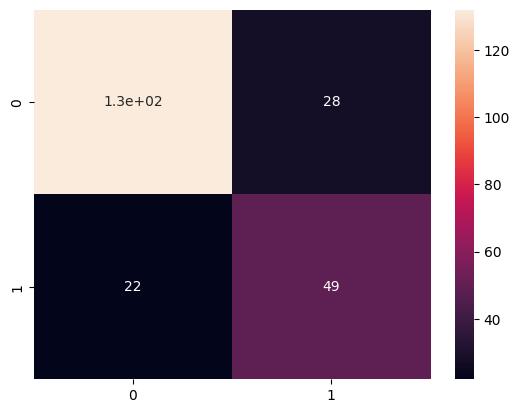

In [ ]:
sns.heatmap(conf_mat, annot=True)

In [ ]:
model = SVC(kernel = 'linear', random_state=0)
model.fit(X_train, y_train)
svc_prediction = model.predict(X_test)
print('SVC Prediction:', svc_prediction)

SVC Prediction: [0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 1]


In [ ]:
conf_mat = pd.crosstab(y_test, svc_prediction, rownames = ['Actual'], colnames = ['Predicted'])
print(conf_mat)
accuracy = metrics.accuracy_score(y_test, svc_prediction)
print("SVC Accuracy: ", accuracy)

Predicted    0   1
Actual            
0          132  28
1           22  49
SVC Accuracy:  0.7835497835497836


<Axes: >

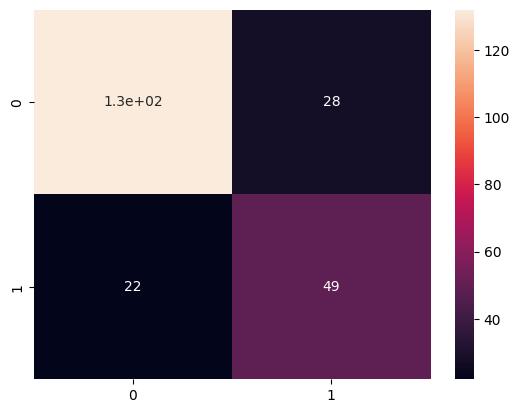

In [ ]:
sns.heatmap(conf_mat, annot=True)